# Final Project

## By: Grace Napolitan, Jonathan Martinez-Carrada, Molly Grothem, Lily Phanthavong, 

# Abstract

### Our project strives to look at how certain student habits, such as extracurricular hours and studying hours, might have an influence on GPA. By observing 4 data sets, each from different locations and/or subjects, we plan to find a correlation between certain habits and GPA. Our data sets explore data sets from India, Malaysia, and Portugal as a way to see if certain findings are universal.

## Introduction and Background

We are exploring how students habits affect their final grade in their classes. Specifically, we are seeing how their attendance, study time, their activities outside of school, and free time they have affect their final grade in their courses. Also, we have multiple data sets from different locations: India, Portugal, and Malaysia, which provides diversity of differing education systems. It will allow us to have a better understanding on how students' habits impact their performance in school and their final grade. It is interesting how splitting up student's time can truly impact their grade, for better or worse. Our analysis is relevant because student's should care and pay attention to how their habits impact their grades because that dictates their education, which is very important in life and can be to their futures. This analysis can bring attention to students' habits, positive or negative, and encourage students' to alter their habits or continue to live them normally. 

# Data Used and Exploratory Analysis

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Data Set 1: India

### This data was obtained publicly from Kaggle. In this data, there are 8 variables and 2000 observations. This data is primarily from India, where 2000 students answered a survey through a google form. The data is a dataset of various lifestyle and academic habits/aspects of 2000 students. The data was collected from August 2023 to May 2024. There are not really any ethical concerns as there is no data that will connect any data to one person. The student ID column is simply an index column rather than an identification column. The data simply consists of inputs, such as numbers, which is not revealing of anything personal.

### https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset/data

In [50]:
DF_india = pd.read_csv('student_lifestyle_dataset.csv')
DF_india

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [51]:
DF_india.dtypes

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object

#### The 8 variables consist of: Student_ID is an integer, which serves more as an index number so it will not really be taken into account, Study_Hours_Per_Day, which is a float, which represents the amount of hours that a student spends studying per day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Physical_Activity_Hours_Per_Day, and GPA are all floats and they are exactly what they say which is the amount of hours that a student does the corresponding activity per day, Social_Hours_Per_Day is a float and it represents how much times a student spends socializing per day, and Stress_Level is an object and it is a self report of a students stress level which can be reported as Low, Moderate, and High.

In [52]:
DF_india.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [53]:
show(DF_india["Stress_Level"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### An initial analysis shows that most of the data points show that most of the students in the set have high levels of stress. This could possibly introduce some skewing.

In [54]:
show(DF_india["Extracurricular_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### This analysis shows that most of the students do around 1.6 hours of extracurricular hours per day. 

In [55]:
show(DF_india["Study_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### Most students study around 6.3 hours per day which seems a bit high.

In [56]:
show(DF_india["Social_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### This analysis shows that most students are social for around 0.3 hours a day.

In [57]:
show(DF_india["Physical_Activity_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### This analysis shows how most people do physical activity for around 4 hours per day.

## Data Set 2: Mendeley Data Set

This Data set is about student Performance at Universiti Malaya. Which is a Univeristy in Malaysia. It was gathered from a questionaire asking 16 different questions about the stutudents grades, what departmenet they were, and their habits. Overall it has 493 observations from the students.

I gathered this data from data.mendeley.com which I beleive on the surface is ethically okay. I didn't ask for explicit permission if it was okay to use this dataset and data from this survey but they did have a button that allowed to me easily just download the CSV file.

In [58]:
url = 'https://raw.githubusercontent.com/lkp04/Data-File/refs/heads/main/ResearchInformation3.csv'
df = pd.read_csv(url)
df


,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Public Health,Male,3.50,4.00,"Lower middle (15,000-30,000)",Village,2,More than 3 Hours,2-3 Hours,40%-59%,Yes,2,Yes,7th,3.250,3.100
489,Public Health,Male,4.50,4.00,"Upper middle (30,000-50,000)",City,4,2-3 Hours,2-3 Hours,60%-79%,No,3,Yes,9th,3.500,3.670
490,Sociology,Female,4.56,3.67,"Lower middle (15,000-30,000)",City,3,0-1 Hour,2-3 Hours,40%-59%,No,2,No,2nd,3.560,3.560
491,Sociology,Male,4.23,4.50,"Low (Below 15,000)",Village,3,More than 3 Hours,2-3 Hours,80%-100%,No,3,Yes,10th,3.610,3.750


In [59]:
df_copy1 = df.drop(['SSC'], axis=1)
df_copy1
df_copy2 = df.drop(['SSC','Semester','Computer','Job','Department'], axis=1)
df_copy2

,Gender,HSC,Income,Hometown,Preparation,Gaming,Attendance,English,Extra,Last,Overall
0,Male,4.17,"Low (Below 15,000)",Village,More than 3 Hours,0-1 Hour,80%-100%,3,Yes,3.220,3.350
1,Female,4.92,"Upper middle (30,000-50,000)",City,0-1 Hour,0-1 Hour,80%-100%,3,Yes,3.467,3.467
2,Male,5.00,"Lower middle (15,000-30,000)",Village,0-1 Hour,More than 3 Hours,80%-100%,4,Yes,4.000,3.720
3,Male,4.00,"High (Above 50,000)",City,More than 3 Hours,More than 3 Hours,80%-100%,5,Yes,3.800,3.750
4,Female,2.19,"Lower middle (15,000-30,000)",Village,0-1 Hour,2-3 Hours,80%-100%,3,Yes,3.940,3.940
...,...,...,...,...,...,...,...,...,...,...,...
488,Male,3.50,"Lower middle (15,000-30,000)",Village,More than 3 Hours,2-3 Hours,40%-59%,2,Yes,3.250,3.100
489,Male,4.50,"Upper middle (30,000-50,000)",City,2-3 Hours,2-3 Hours,60%-79%,3,Yes,3.500,3.670
490,Female,4.56,"Lower middle (15,000-30,000)",City,0-1 Hour,2-3 Hours,40%-59%,2,No,3.560,3.560
491,Male,4.23,"Low (Below 15,000)",Village,More than 3 Hours,2-3 Hours,80%-100%,3,Yes,3.610,3.750


In [60]:
df_copy2.shape

(493, 11)

I took out some of the variables since i wasn't going to use all of them. Orginally there were 15 different variables but i now will only be working with 11. so our data set will have 11 different Variables and 493 observations.

In [61]:
df_copy2.columns

Index(['Gender', 'HSC', 'Income', 'Hometown', 'Preparation', 'Gaming',
       'Attendance', 'English', 'Extra', 'Last', 'Overall'],
      dtype='object')

In [62]:
#df_copy1.describe()
df_copy1.dtypes
#df_copy1.describe(include='all')

#df_copy1['Overall'] = df_copy1['Overall'].astype('float64')
df_copy2['English'] = df_copy2['English'].astype('int64')


show(df_copy2.dtypes)
#df_copy2


Loading ITables v2.5.2 from the internet... (need help?)


In [63]:
df_copy2.describe()

,HSC,English,Last,Overall
count,493.000000,493.000000,493.000000,493.000000
mean,4.156775,3.569980,3.163888,3.188383
std,0.546504,0.870515,0.641475,0.591801
min,2.170000,1.000000,1.000000,1.000000
25%,3.830000,3.000000,2.810000,2.880000
50%,4.170000,4.000000,3.250000,3.270000
75%,4.500000,4.000000,3.670000,3.680000
max,5.000000,5.000000,4.000000,4.000000


We have 11 Variabes, almost all of the varaibles are Numerical. I would say only 3 out of the 11 variables are Categorical and there are 8 variables that are Numerical. all 8 Numerical Values except one arediscrete as each one has it's limit to what the largest and smallest number can be whether its a range of 0-5 for Grade and English comprehension or a percentage out of 100%. The only Numerical variable thats not discrete is Income as Price is Continous and the ranges can change depending how much a person can make. The other 3 variables are categorical 2 of them being ordinal as they are yes or no (gender, and Extra), while one of them is Nominal because they could be from anywhere of any class (hometown).

In [64]:
df_copy2.describe()

,HSC,English,Last,Overall
count,493.000000,493.000000,493.000000,493.000000
mean,4.156775,3.569980,3.163888,3.188383
std,0.546504,0.870515,0.641475,0.591801
min,2.170000,1.000000,1.000000,1.000000
25%,3.830000,3.000000,2.810000,2.880000
50%,4.170000,4.000000,3.250000,3.270000
75%,4.500000,4.000000,3.670000,3.680000
max,5.000000,5.000000,4.000000,4.000000


In [65]:
show(df_copy2['Overall'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


In [66]:
show(df_copy2['Attendance'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


In [67]:
show(df_copy2['Gaming'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


In [68]:
show(df_copy2['Preparation'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


In [69]:
show(df_copy2['Extra'].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


Speficially, i want to get a deep look into these four variables the most to Determine their habits based of GPA. Attendance, Gaming, Prepreation, and Extra.

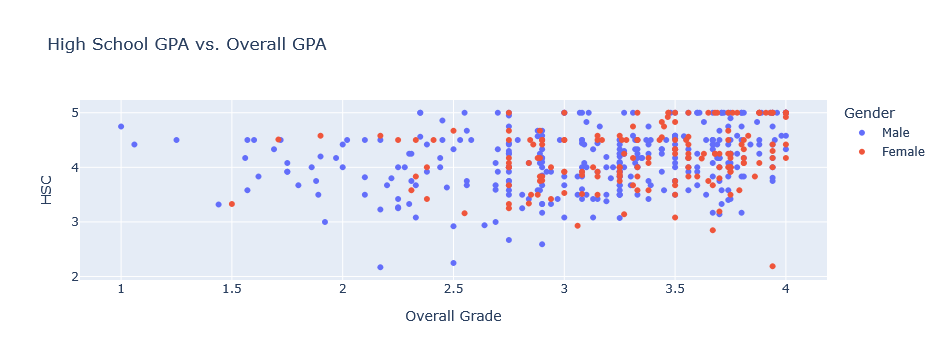

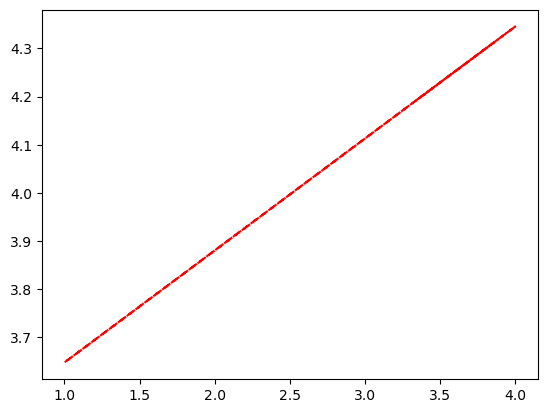

In [70]:
fig = px.scatter(df_copy2,x='Overall', y='HSC', color ="Gender", title='High School GPA vs. Overall GPA')
z= np.polyfit(df_copy2['Overall'], df_copy2['HSC'], 1)
p = np.poly1d(z)

fig.update_layout(
                  xaxis_title="Overall Grade",
                  yaxis_title="HSC"
                  )


fig.show()
plt.plot(df_copy2['Overall'],p(df_copy2['Overall']),"r--")

I thought it would be intresting to see if i could see any trends between grades from highschool to higher education. whether it would drop or increase. Overall It's pretty scatter but i would say its heavily populated that genereally people who scored high in high school also scored high in university. there are some varaition of students who scored better at university than in high school though.

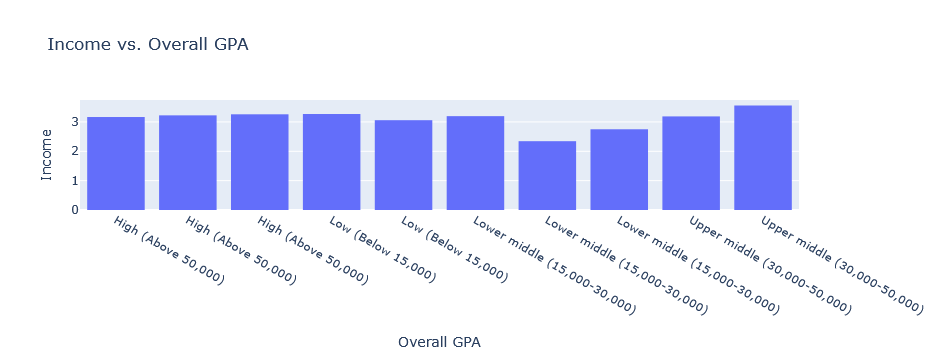

In [71]:
df2 = df_copy2.groupby('Income')['Overall'].mean().reset_index()

fig = px.histogram(df2,x='Income', y='Overall', title='Income vs. Overall GPA')

fig.update_layout(
                  xaxis_title="Overall GPA",
                  yaxis_title="Income"
                  )


fig.show()

I was intrested if ther was any clear difference between income and someones GPA. Overall it doesn't looks like there is any significane betwee how much someone makes and the overall GPA. Although there is a dip in teh range Lower middle 15,000 - 30,000. i'm not a hundres percent sure. The people with the highest GPAs don't make the most which i thought was intresting to look at too.

# Data Set 3: Portugal (Portuguese Scores)

The data set used here is from UC Irvine Machine Learning Repository. It shows student's performance in Portuguese in secondary education from schools in Portugal.

In [72]:
file_location = 'student-por.csv'
DF_2 = pd.read_csv(file_location,na_filter=False)
DF_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [73]:
DF_2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [74]:
show(DF_2.value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


In [75]:
DF_2.shape

(649, 33)

In [76]:
DF_2.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

All of the code above is a basic analysis of the data set. It shows how many variable and observations, the column names, some numerical information, etc. 

## Data Set 4: Portugal (Mathematics Scores)

This data set, Student Performance, is from UC Irvine Machine Learning Repository. It was complied by using school reports and questionaires in two Portuguese schoools. It displays student's performance in Mathmematics in secondary education.

In [77]:
file_location = 'student-mat.csv'
DF3 = pd.read_csv(file_location,na_filter=False)
DF3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [78]:
DF3.shape

(395, 33)

There are 395 observations and 33 variables.

In [79]:
DF3.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Lists all of the variables in the data set.

In [80]:
DF3.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The average final grade is 10.41 out of 20. The average amount of absences is 5.71. The average for free time is 3.24 hours. The average for study time 2.04 hours.

##

## Proposed Questions

In this paper, we will be looking into these four Data sets and exploring two central Questions: 1. Are there any identifiable correlations between students' habits and their Overall GPA? and 2. Do these relationships differ regionally, or are patterns generally the same?

To answer these questions, first, we want to find a couple of variables that all four data sets have in common to create a meaningful comparison. After establishing these variables, we will be creating our plots or graphs to help examine trends within each data set. We will then compare our results across all four groups, looking for any similarities, patterns, or differences. This approach will allow us to determine whether the correlations we make are consistent regionally or if its uniquely different for each data set.

#

## Analysis and Results

### Data Set 1: India

In [81]:
DF_india.rename(columns = {'Study_Hours_Per_Day':'Study Hours','Extracurricular_Hours_Per_Day':'Extracurricular Hours',
                    'Sleep_Hours_Per_Day':'Sleep Hours','Social_Hours_Per_Day':'Social Hours',
                    'Physical_Activity_Hours_Per_Day':'Physical Activity Hours','Stress_Level':'Stress Level',
                    'Student_ID':'Student ID'},inplace = True)
show(DF_india)

Loading ITables v2.5.2 from the internet... (need help?)


In [82]:
DF_india.dtypes

Student ID                   int64
Study Hours                float64
Extracurricular Hours      float64
Sleep Hours                float64
Social Hours               float64
Physical Activity Hours    float64
GPA                        float64
Stress Level                object
dtype: object

In [83]:
DF_study = DF_india.groupby('Study Hours')['GPA'].mean().reset_index()
DF_study

fig_study = px.scatter(DF_study, x = 'Study Hours', y = 'GPA',
                  title = 'Study Hours vs. Average GPA',
                      trendline = 'ols')
fig_study.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_study.show()

### Based on this scatter plot, there is a big positive correlation between Sleep Hours and average GPA. The line of fit has a great R^2 score of 0.981, meaning that over 98 percent of the variance can be predicted/explained by the linear fit. As a result, this graph shows how the more you study, the more likely your GPA is to be.
### This logically does make sense. The more that one studies, the better the overall grades that one will get.

In [84]:
fig_gpafreq = px.histogram(DF_india, x = 'GPA', nbins = 12, color = 'Stress Level')
fig_gpafreq.update_layout(bargap=0.02,
                  title='Frequency of GPAs with Stress Levels',
                  title_x=0.5,
                  yaxis_title="Frequency",
                  xaxis_title="GPA",
                  autosize=False,
                  width=800,
                  height=500,
                  template="ggplot2")
fig_gpafreq.show()

### Furthermore, we also observed if a GPA had some sort of relation with stress level. Plotting the frequency of GPA and coloring the histogram by stress level, we can see that as GPA increases, the stress level increases. So, as GPA gets higher, there is a drawback as one is most likely to get more stressed.

In [85]:
DF_physicalin = DF_india.groupby('Physical Activity Hours')['GPA'].mean().reset_index()
DF_physicalin

fig_physicalin = px.scatter(DF_physicalin, x = 'Physical Activity Hours', y = 'GPA',
                  title = 'Physical Activity Hours vs. Average GPA',
                         trendline = 'ols')
fig_physicalin.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_physicalin.show()

### Based on the scatter plot and the trendline, the amount of physical hours a student performs does have some sort of negative correlation with GPA. Using the mean GPA, we graphed the GPA against Physical activity hours and plotted a trendline. The score of the trendline is 0.741, meaning that the linear fit accounts for around 74 percent of the data points. 

### Based on this, one could say that there is some sort of correlation between physical activity hours and GPA. As your GPA gets higher, the less time you have for physical activity.

In [86]:
DF_socialin = DF_india.groupby('Social Hours')['GPA'].mean().reset_index()
DF_socialin

fig_socialin = px.scatter(DF_socialin, x = 'Social Hours', y = 'GPA',
                  title = 'Social Hours vs. Average GPA',
                       trendline = 'ols')
fig_socialin.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_socialin.show()

### Based on this scatter plot, there is hardly any correlation between how many hours a student socializes and GPA. The trendline shows how dispersed the data points are from it, and the trendline's values confirm that. The line's score is 0.245, meaning it accounts for only about 24% of the data points. Overall, there is not much correlation. 

### Some aspects of this graph would make sense, as the negative correlation suggests that one would have less time to socialize with others, as they would be more focused on their education.

In [87]:
DF_extrain = DF_india.groupby('Extracurricular Hours')['GPA'].mean().reset_index()
DF_extrain

fig_extrain = px.scatter(DF_extrain, x = 'Extracurricular Hours', y = 'GPA',
                  title = 'Extracurricular Hours vs. Average GPA',
                      trendline = 'ols')
fig_extrain.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_extrain.show()

### Although this graph shows a negative correlation between Extracurricular Hours and Average GPA, the correlation is very small and hardly fits. The score of the trendline is 0.03 with a slope of -0.006. That means there is hardly an influence by extracurricular hours on GPA. 

In [88]:
DF_sleepin = DF_india.groupby('Sleep Hours')['GPA'].mean().reset_index()
DF_sleepin

fig_sleepin = px.scatter(DF_sleepin, x = 'Sleep Hours', y = 'GPA',
                  title = 'Sleep Hours vs. Average GPA',
                      trendline = 'ols')
fig_sleepin.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_sleepin.show()

### As an extra analysis, we observed sleep hours. On first glance of the graph, we could already tell that sleep has little to no effect on GPA, which is surprising. We expected that as one slept less, the less focused one would be on their education. However, this scatter plot does not support that hypothesis. The score of the line is 0.001 and is slightly negative with a slope of -0.001. The trendline shows that there is little to no correlation between sleep and GPA.

### One could say that the ones that some students with higher GPA's often pull all nighters or stay up late a lot.

In [89]:
DF_india

,Student ID,Study Hours,Extracurricular Hours,Sleep Hours,Social Hours,Physical Activity Hours,GPA,Stress Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [90]:
dummy_datain = pd.get_dummies(DF_india, columns = ['Stress Level'],dtype = float)
dummy_datain

,Student ID,Study Hours,Extracurricular Hours,Sleep Hours,Social Hours,Physical Activity Hours,GPA,Stress Level_High,Stress Level_Low,Stress Level_Moderate
0,1,6.9,3.8,8.7,2.8,1.8,2.99,0.0,0.0,1.0
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0.0,1.0,0.0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0.0,1.0,0.0
3,4,6.5,2.1,7.2,1.7,6.5,2.88,0.0,0.0,1.0
4,5,8.1,0.6,6.5,2.2,6.6,3.51,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,0.0,0.0,1.0
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,0.0,0.0,1.0
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,0.0,0.0,1.0
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,1.0,0.0,0.0


In [91]:
Xin = dummy_datain[['Study Hours', 'Extracurricular Hours', 'Social Hours', 'Physical Activity Hours','Stress Level_High','Stress Level_Moderate','Stress Level_Low']].values.reshape(-1,7)
yin = dummy_datain['GPA']

#do the regression
LM_in = LinearRegression()
LM_in.fit(Xin,yin)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
LM_in.coef_

array([ 0.15767361, -0.00376018,  0.00508544,  0.00365796,  0.0030697 ,
       -0.01273081,  0.00966111])

#### Based on the coefficients, studying hours has the biggest effect on the GPA in comparison to the other variables.

In [93]:
LM_in.intercept_

np.float64(1.916396408666098)

In [95]:
LM_in.score(Xin,yin)

0.5417504784010405

In [ ]:
Rsq =  0.5417504784010405
k = 7
n = len(dummy_datain)
AdjRsq = 1-((1-Rsq)*(n-1)/(n-k-1))

print(AdjRsq)

### Using dummy data and a linear fit, we were able to get a score of a linear fit based on multiple variables and using them to predict GPA. The adjusted R^2 score is 0.5401. The linear fit suggests that using 'Study Hours', 'Extracurricular Hours', 'Social Hours', 'Physical Activity Hours',' Stress Level_High',' Stress Level_Moderate', and 'Stress Level_Low', around 54 percent of the data can be explained by the linear fit. The score is not exactly what we had expected, as we had hypothesized that certain variables, such as studying hours, would cause the score to shift higher.

### Earlier, we saw that study hours had a good correlation with average GPA, but here we see that by including other variables, the score lowers significantly. The slope of study hours for the linear fit here is 0.157, and the one earlier was 0.152. Although they had similar slopes, the new, much lower score, which was around 98 percent earlier, shows how little influence the other variables have in comparison to study hours. However, we also have to take into account how earlier we used AVERAGE GPA, and for our linear fit, we used all GPA points; this could have greatly affected our linear fit. This also suggests that studying hours might have less of an influence on GPA than originally thought.

In [ ]:
dummy_datain['Prediction GPA'] = LM_in.predict(Xin)
dummy_datain['Residual of Prediction GPA'] = dummy_datain['GPA']-dummy_datain['Prediction GPA']
dummy_datain

In [ ]:
fig_residualin = px.scatter(dummy_datain,x='Prediction GPA',y='Residual of Prediction GPA')

# Update layout to show axis line at y=0
fig_residualin.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"}
)

fig_residualin.update_layout(template="ggplot2",
                  title='Residual as a Function of Predicted GPA',
                  title_x=0.5
                 )

fig_residualin.show()

### Based on the residual graph, a linear fit seems to somewhat support the data, which is supported by the R^2 score from above. The data seems to be scattered well on both sides of the line, and no obvious patterns are present.

### Overall, based on Study Hours, Extracurricular Hours, Social Hours, Physical Activity Hours, Stress Level, and even Sleep Hours, there seems not to be much correlation between these and GPA. Although earlier we saw that study hours had a great correlation with AVERAGE GPA, we saw that doing a linear fit further shows how much the score lowered. The linear fit could ALSO suggest that average GPA really changes the results in comparison to using every single GPA point.

#

### Data Set 2: Malaysia 

In [ ]:
fig_mal = px.box(df_copy2,x='Overall', y='Gaming', color ="Gender", title='Hours spent gaming vs. Overall GPA')

fig_mal.update_layout(
                  xaxis_title="Overall Grade",
                  yaxis_title="Hours spent Gaming"
                  )


fig_mal.show()


Students who spend None to as little a 1 hour of gaming a day generally got better grades than those that game more hours.

highlihghts:
- all three categories still has student who scored well in their grades no matter how long they gamed for.
- in all options females still generally scored higher than the males in all time options.
- male who gamed 3+ hours had a large varaition thorughout the entire GPA scale.

In [ ]:
fig_mal = px.box(df_copy2,
                y='Preparation',
                x='Overall',
                title='grade vs. Preparation for test',
                color = 'Gender'
                )
fig_mal.show()

based on the data Students who study more tend to get higher grades. Specically look at students who study 3+ hours generally get better grades.

highlights:
- female students trend slightly higher than males across all prep options.
- males show more varaibility between all 3 options especailly in the 0-1 hour prep.
- the median Jump between not or barely studying to 2-3 hours is significant is showing student imporvemnet on their overall Gpa.

In [ ]:
df2 = df_copy2.groupby('Attendance')['Overall'].mean().reset_index()
fig_mal = px.box(df_copy2,
                y='Attendance',
                x='Overall',
                title='Grade vs. Were They There',
                color = 'Gender'
                )
fig_mal.show()

Students who came to calss 80%-100% generally had higher GPAs compared attending class less.
highlights:
- students who came less than 40% generally has lower GPAs except for the one outlier who had a 3.3 GPA.
- all of the females bow polts are pretty symetrical with the slight skewness from the 80%-100%.

In [ ]:
fig_mal = px.box(df_copy2,
                y='Extra',
                x='Overall',
                title='Grade vs. Were they in any Extra Curriculars',
                color = 'Gender'
                )
fig_mal.show()

Here is a box plot that shows that both females and Males who have said are involved with extracurriculars generally have higher GPAs than those who said no.

Some things to highlight are that:
- The female medians are both slightly higher than the male median in both categories with narrower ranges. This shows more consistent performances among females
- The No category students have more Outliers ,particularly in the Males with low grades, around 1 and 1.2 GPA.